In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('customer_support_tickets.csv')

In [3]:
print('Dataset loaded successfully!')

Dataset loaded successfully!


In [4]:
data.shape

(8469, 17)

In [5]:
print(data)

      Ticket ID        Customer Name              Customer Email  \
0             1        Marisa Obrien  carrollallison@example.com   
1             2         Jessica Rios    clarkeashley@example.com   
2             3  Christopher Robbins   gonzalestracy@example.com   
3             4     Christina Dillon    bradleyolson@example.org   
4             5    Alexander Carroll     bradleymark@example.com   
...         ...                  ...                         ...   
8464       8465           David Todd          adam28@example.net   
8465       8466           Lori Davis       russell68@example.com   
8466       8467      Michelle Kelley        ashley83@example.org   
8467       8468     Steven Rodriguez         fpowell@example.org   
8468       8469      Steven Davis MD          lori20@example.net   

      Customer Age Customer Gender       Product Purchased Date of Purchase  \
0               32           Other              GoPro Hero       2021-03-22   
1               42       

In [6]:
data.shape

(8469, 17)

In [7]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [8]:
data = data.dropna(subset=['Customer Satisfaction Rating'])

In [9]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

In [10]:
x = data.drop(['Customer Satisfaction Rating', 'Ticket ID', 'Customer Name', 'Customer Email'], axis = 1, errors = 'ignore')
y = data['Customer Satisfaction Rating']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [13]:
model = RandomForestClassifier(random_state = 42, n_estimators = 200)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [14]:
y_pred = model.predict(x_test)

In [15]:
accuracy_score(y_test, y_pred)

0.23345367027677497

In [16]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         1.0       0.25      0.20      0.22       168\n         2.0       0.24      0.22      0.23       174\n         3.0       0.21      0.26      0.23       175\n         4.0       0.28      0.25      0.26       162\n         5.0       0.20      0.24      0.22       152\n\n    accuracy                           0.23       831\n   macro avg       0.24      0.23      0.23       831\nweighted avg       0.24      0.23      0.23       831\n'

In [17]:
confusion_matrix(y_test, y_pred)

array([[34, 32, 37, 33, 32],
       [24, 39, 55, 23, 33],
       [34, 31, 45, 18, 47],
       [22, 32, 35, 40, 33],
       [21, 26, 39, 30, 36]], dtype=int64)

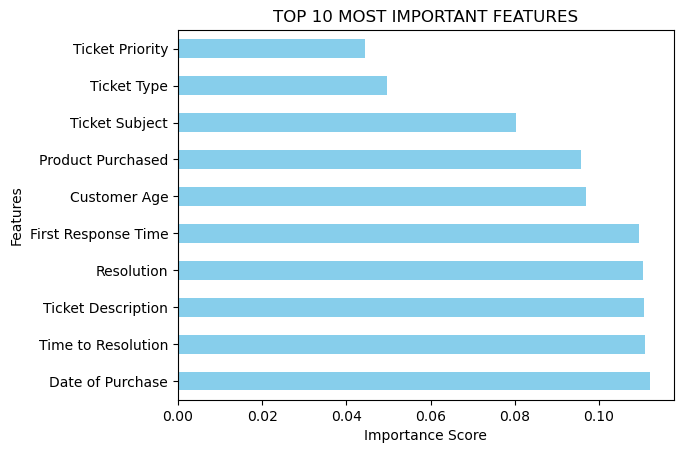

In [18]:
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind = 'barh', color = 'skyblue')
plt.title('TOP 10 MOST IMPORTANT FEATURES')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()